In [11]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Vamos a usar un dataset que tiene forma de tetera 3D

In [12]:
teapot = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1RQSRPZJvHXLYMsrXEdivE-tPTeEIJJQ_"
)

<IPython.core.display.Javascript object>


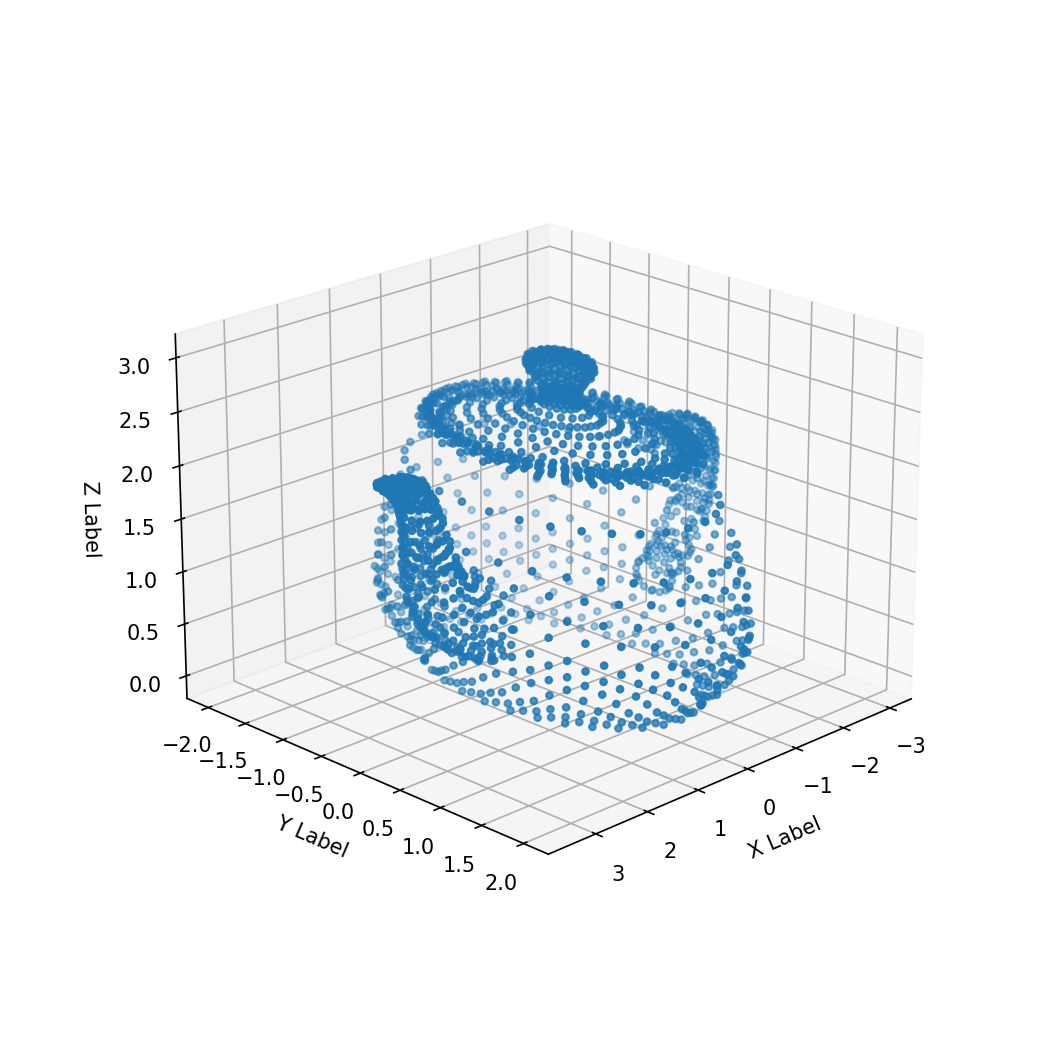

In [13]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(
    teapot.V1.values,
    teapot.V2.values,
    teapot.V3.values,
    marker='o',
    s=10,
    cmap=plt.cm.Spectral,
)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

for i in range(90, 360, 10):
    ax.view_init(None, i)
    plt.show()


Ahora vamos a aplicarle PCA, pasando de 3 dimensiones a 2. ¿Cúales son las 2 dimensiones que contienen más información sobre la tetera? Si tuvieran que sacar una foto: desde donde sacarían la foto para asegurarse que todos sepan que es una tetera?

Para ellos usamos la herramienta PCA con 3 componentes y nos quedamos con los 2 primeros componentes.

In [14]:
pca = PCA(n_components=3)
projected = pca.fit_transform(teapot[["V1", "V2", "V3"]])

In [15]:
pca.components_

array([[ 0.9991768,  0.       ,  0.0405674],
       [ 0.0405674,  0.       , -0.9991768],
       [-0.       , -1.       , -0.       ]])

<IPython.core.display.Javascript object>


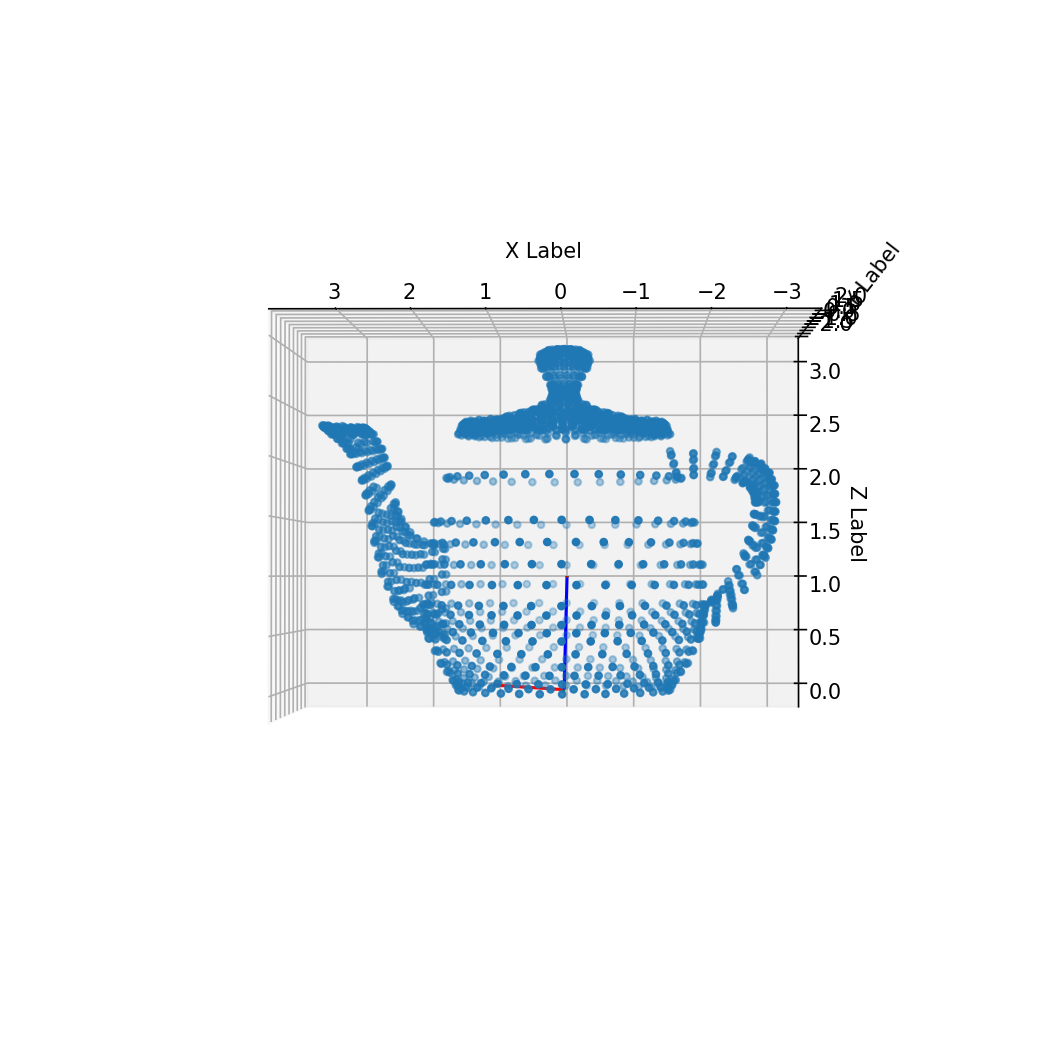

In [16]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(
    teapot.V1.values,
    teapot.V2.values,
    teapot.V3.values,
    marker='o',
    s=10,
    cmap=plt.cm.Spectral,
)

p0 = pca.components_[0]
p1 = -pca.components_[1]
p2 = -pca.components_[2]

origin = [0,0,0]
X, Y, Z = zip(origin,origin,origin) 
U, V, W = zip(p0,p1,p2)

ax.quiver(X,Y,Z,U,V,W, color=['r','b','g'], arrow_length_ratio=0.01)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

for i in range(90, 360, 10):
    ax.view_init(None, i)
    plt.show()

<IPython.core.display.Javascript object>


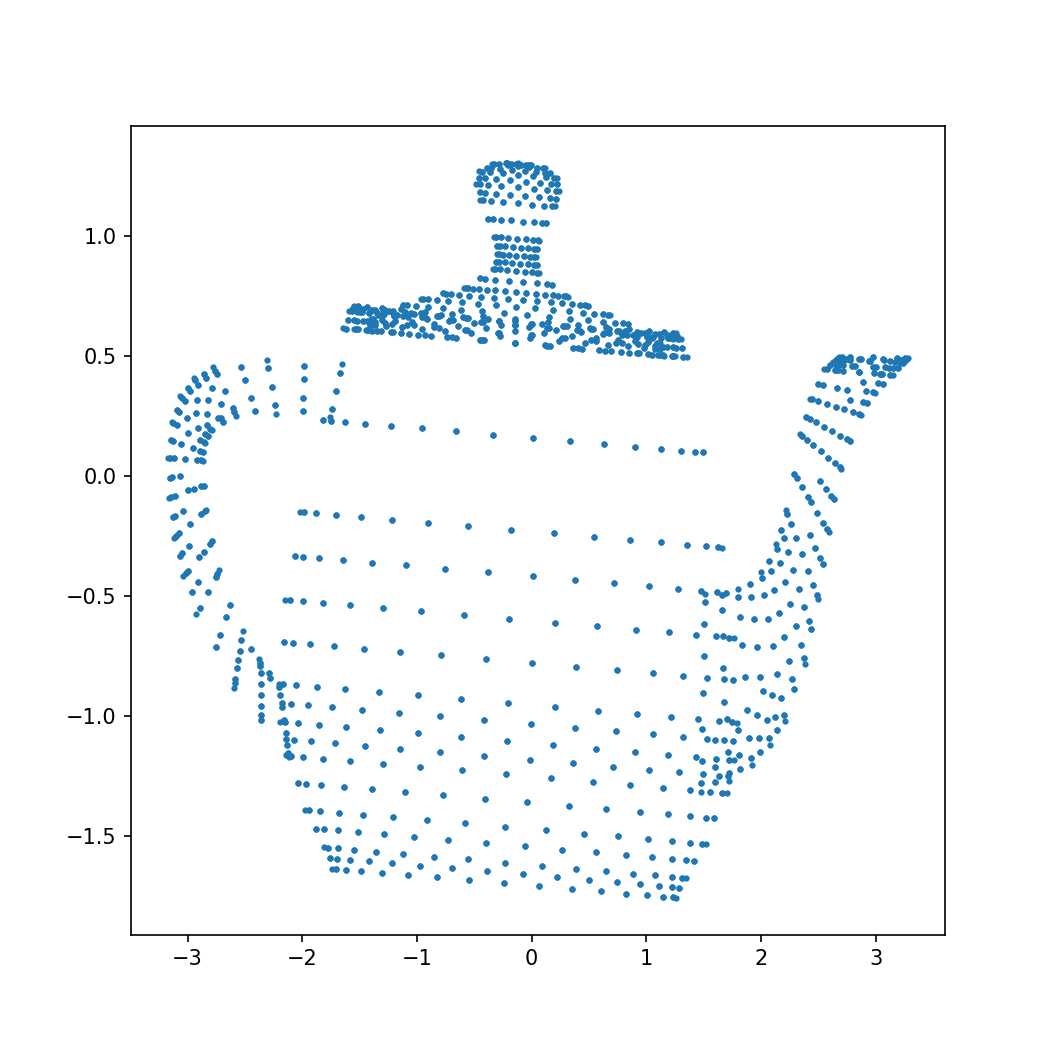

In [17]:
plt.figure(figsize=(7, 7))
plt.plot(projected[:, 0], -projected[:, 1], 'o', markersize=2)

In [18]:
pca.explained_variance_ratio_

array([0.67226965, 0.16874739, 0.15898296])

Es obvio que si vemos esta imágen sabemos que es una tetera, ¿no?. ¿Qué vemos en las dos dimensiones con menor cantidad de información? Para ello nos quedamos con las últimas dos dimensiones de la proyección.

<IPython.core.display.Javascript object>


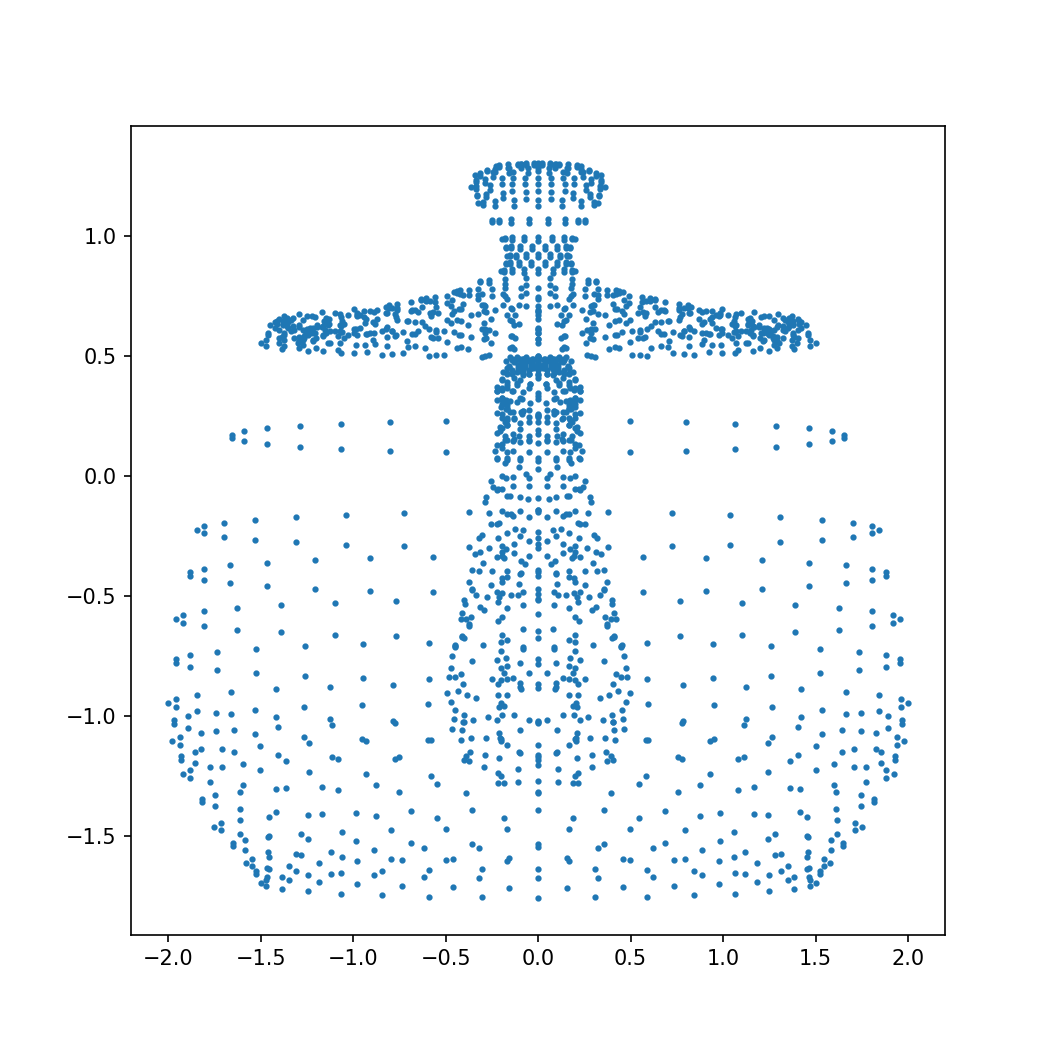

In [19]:
plt.figure(figsize=(7, 7))
plt.plot(projected[:, 2], -projected[:, 1], 'o', markersize=2)

No es claro que si vemos esto reconocemos que es una tetera. Ahora aplicamos el método de reducción de dimensionalidad TSNE.

In [20]:
X_tsne = TSNE(n_components=2, perplexity=150).fit_transform(teapot[["V1", "V2", "V3"]])
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]

<IPython.core.display.Javascript object>


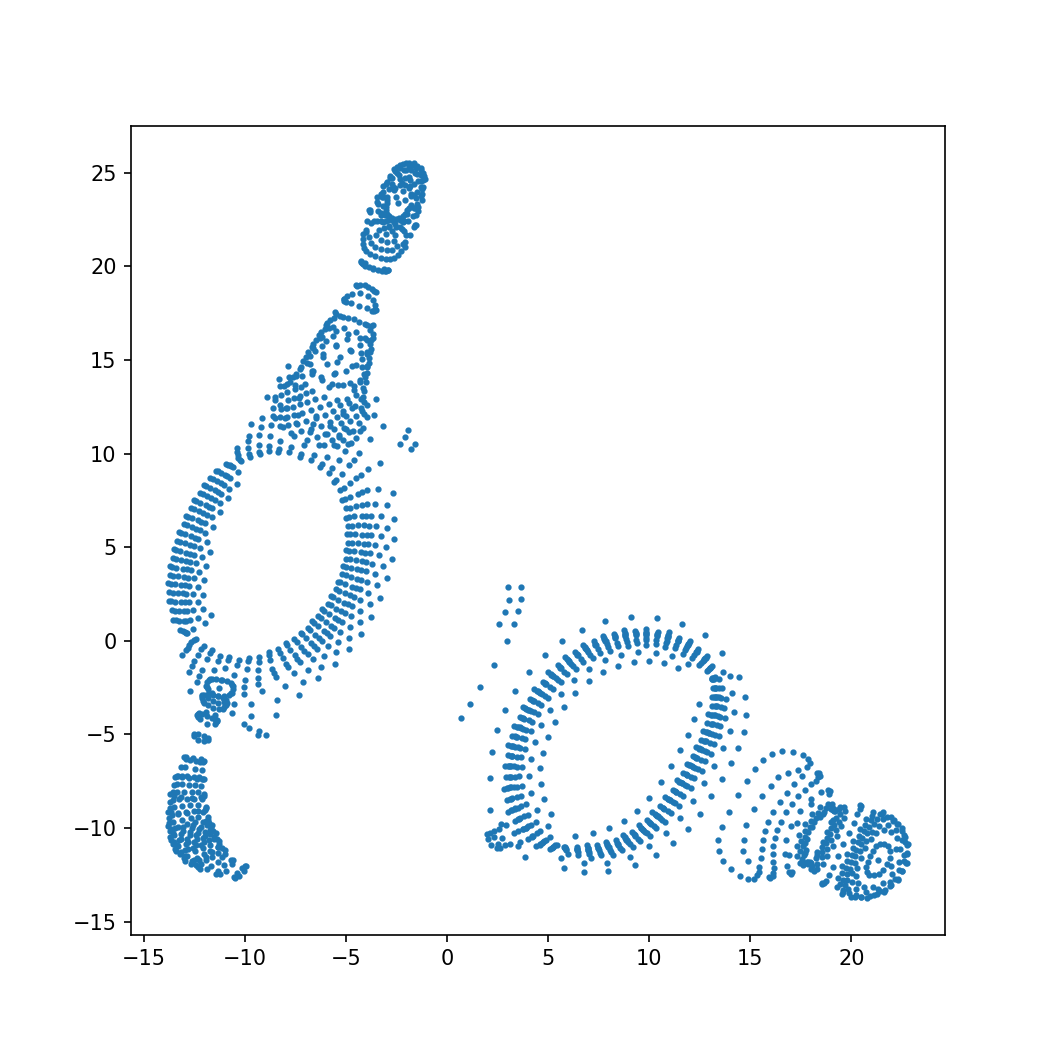

In [21]:
plt.figure(figsize=(7, 7))
plt.plot(x1, x2, 'o', markersize=2)

Vemos que es como si hubiésemos separado la tetera en sus partes. ¿Qué pasa si disminuimos el valor de *perplexity*?

In [22]:
X_tsne = TSNE(n_components=2, perplexity=5).fit_transform(teapot[["V1", "V2", "V3"]])
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]

<IPython.core.display.Javascript object>


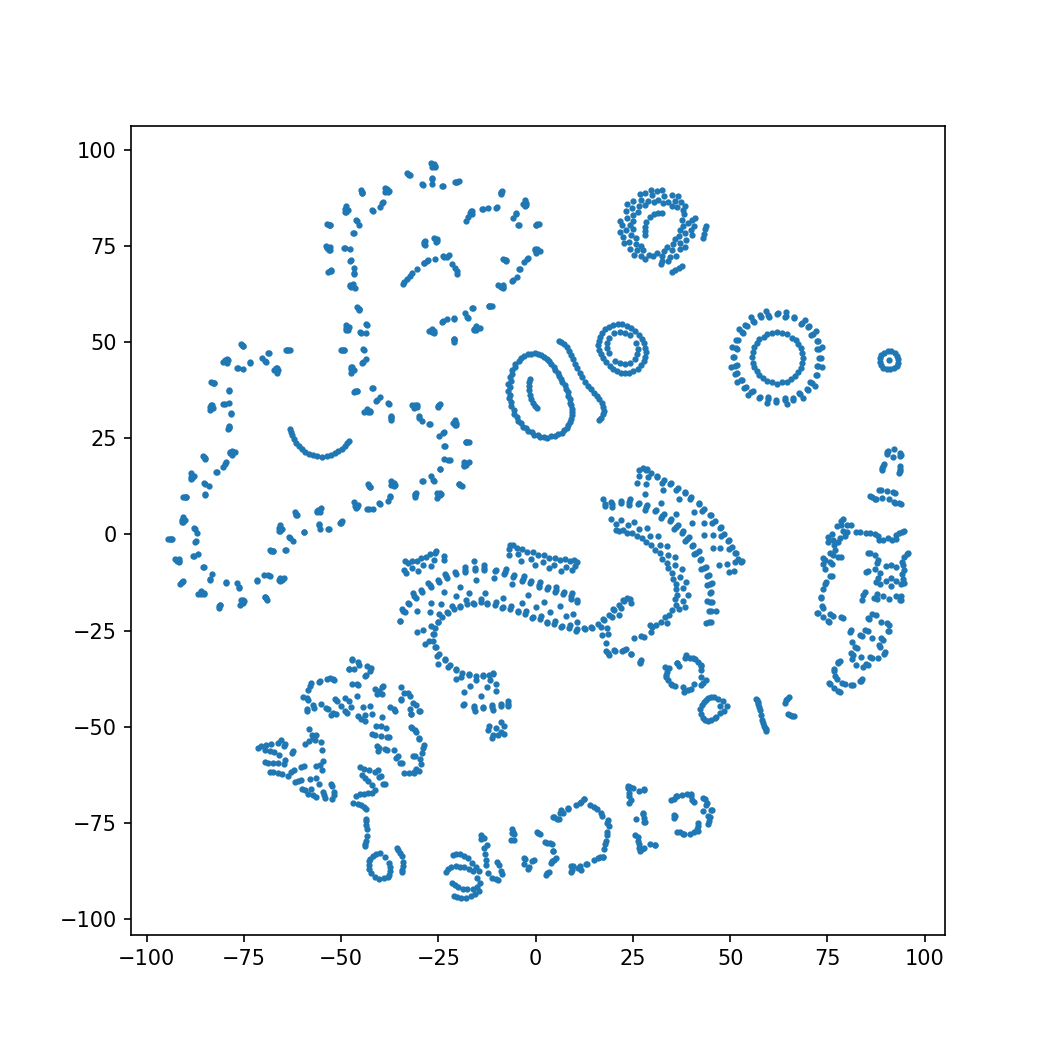

In [23]:
plt.figure(figsize=(7, 7))
plt.plot(x1, x2, 'o', markersize=2)

Vemos que los conglomerados de puntos estan más separados entre sí y los puntos dentro de cada conglomerado están más cercanos. Es como si hubiésemos roto la tetera en muchos pedazos chicos. ¿Qué pasa si ahora aumentamos *perplexity*?

In [24]:
X_tsne = TSNE(n_components=2, perplexity=200).fit_transform(teapot[["V1", "V2", "V3"]])
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]

<IPython.core.display.Javascript object>


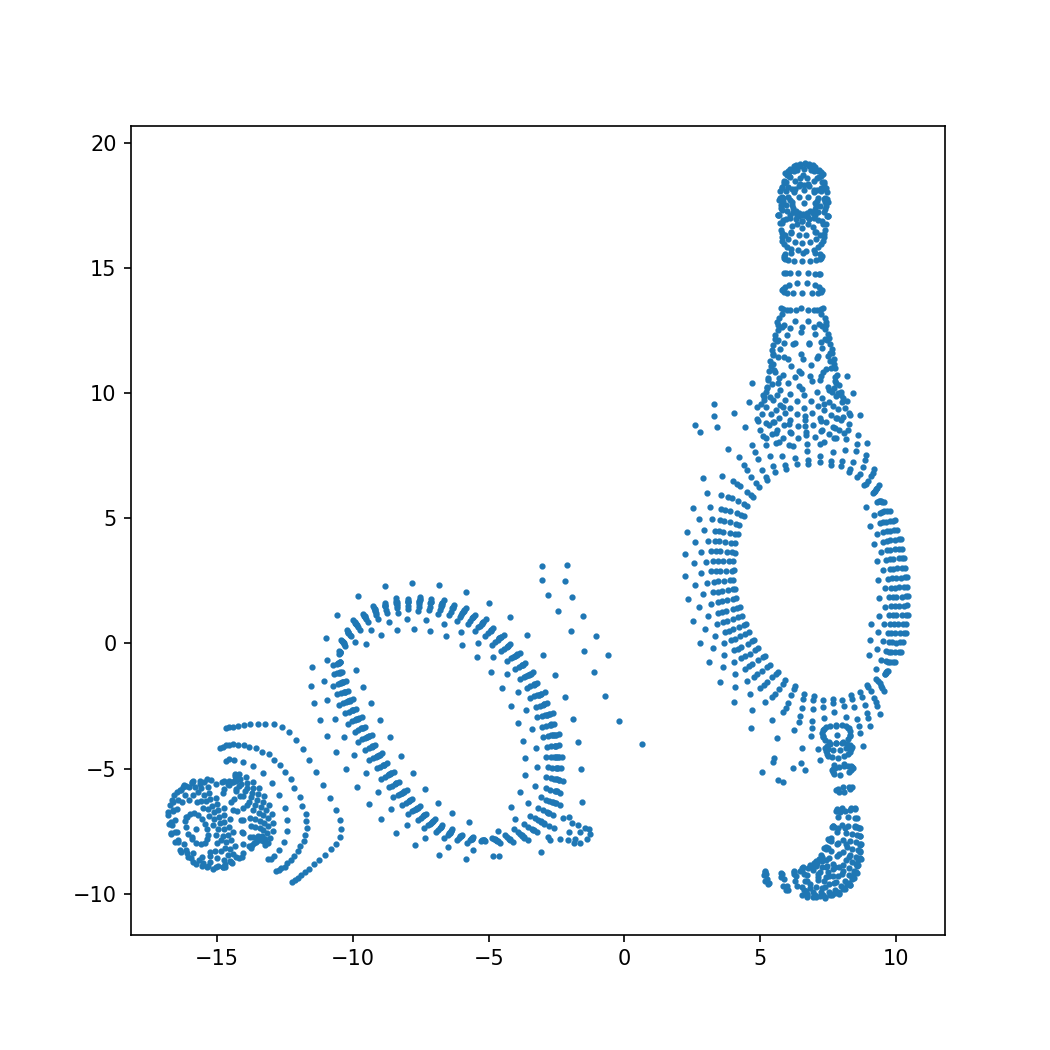

In [27]:
plt.figure(figsize=(7, 7))
plt.plot(x1, x2, 'o', markersize=2)

Los conglomerados vemos que tienen más puntos, incluso en el caso extremo:

<IPython.core.display.Javascript object>


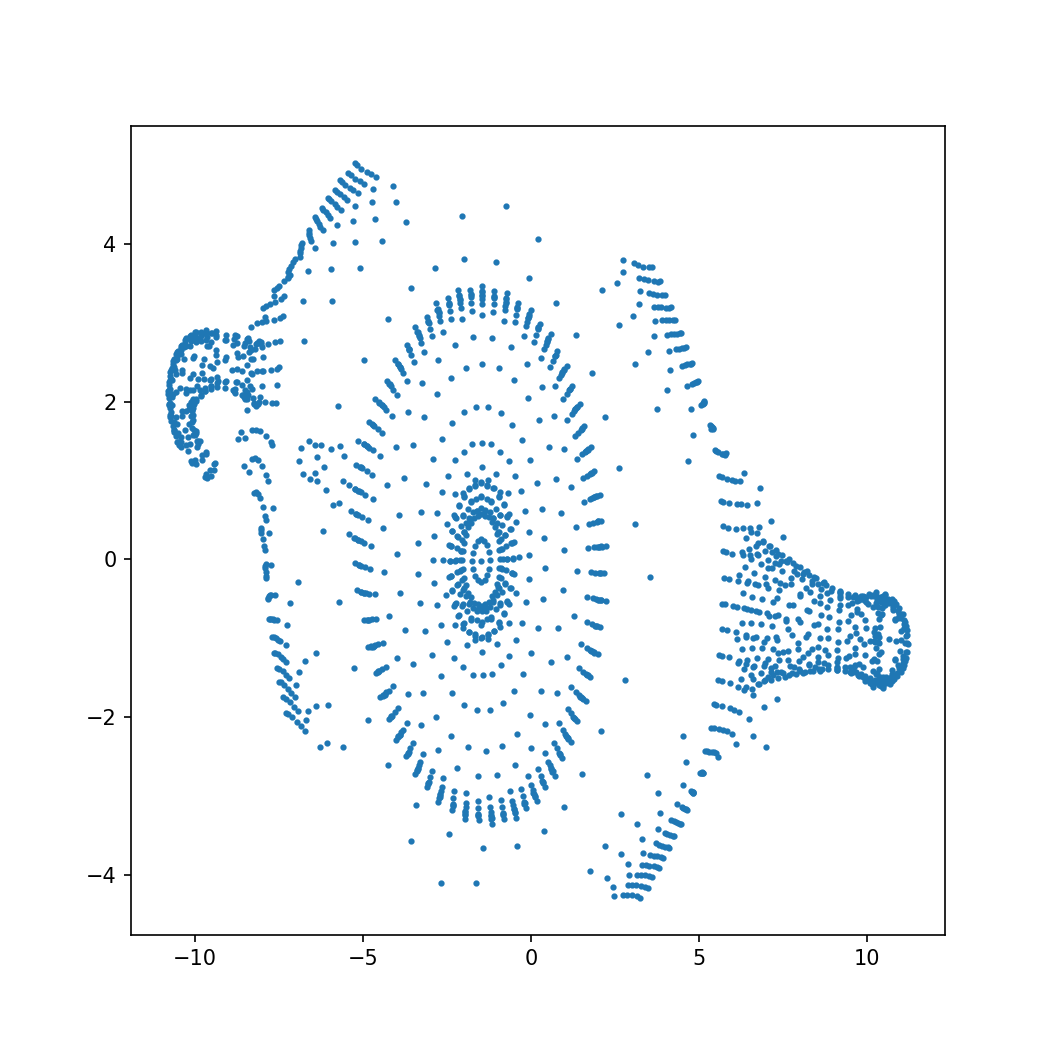

In [28]:
X_tsne = TSNE(n_components=2, perplexity=400).fit_transform(teapot[["V1", "V2", "V3"]])
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]
plt.figure(figsize=(7, 7))
plt.plot(x1, x2, 'o', markersize=2)

Prácticamente hay solo 2 conglomerados distinguibles por el alto valor de *perplexity*. Por lo que queda claro que el valor de *perplexity* controla la noción de vecindad, para valores más altos de *perplexity* más puntos serán considerados vecinos cercanos.

[FAQ](https://lvdmaaten.github.io/tsne/):
- Valores de perplexity: Depende de la densidad de mis datos, valores típicos entre 5 y 50.
- "In t-SNE, the perplexity may be viewed as a knob that sets the number of effective nearest neighbors".
- Por qué t-sne no funciona tan bien como Isomap en el dataset Swiss roll?
    "... But frankly… who cares about Swiss rolls when you can embed complex real-world data nicely?"

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [30]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<IPython.core.display.Javascript object>


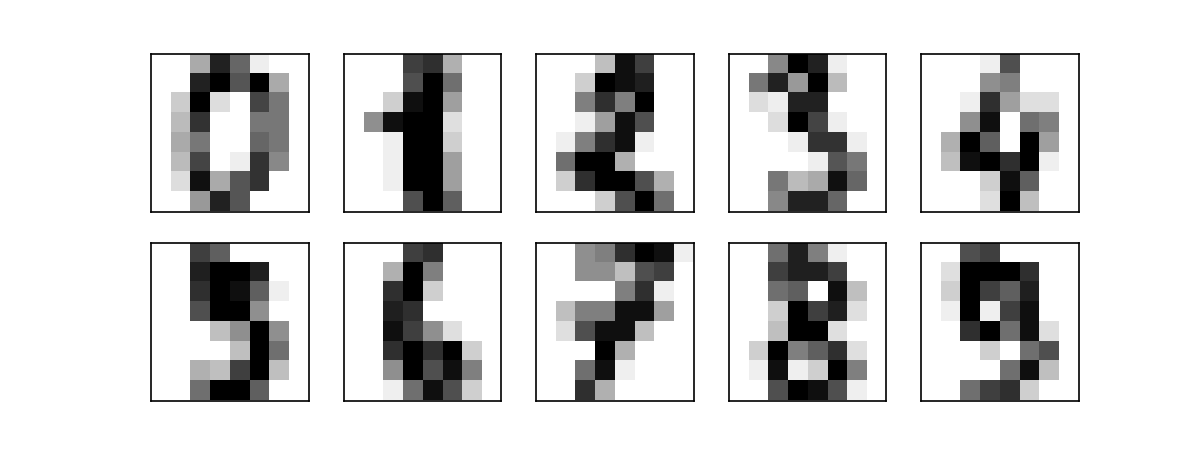

In [31]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = digits.data[:10].reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [32]:
digits.target[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [33]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
tsne = TSNE(perplexity = 10, n_iter=300)
tsne_results = tsne.fit_transform(digits.data)

<IPython.core.display.Javascript object>


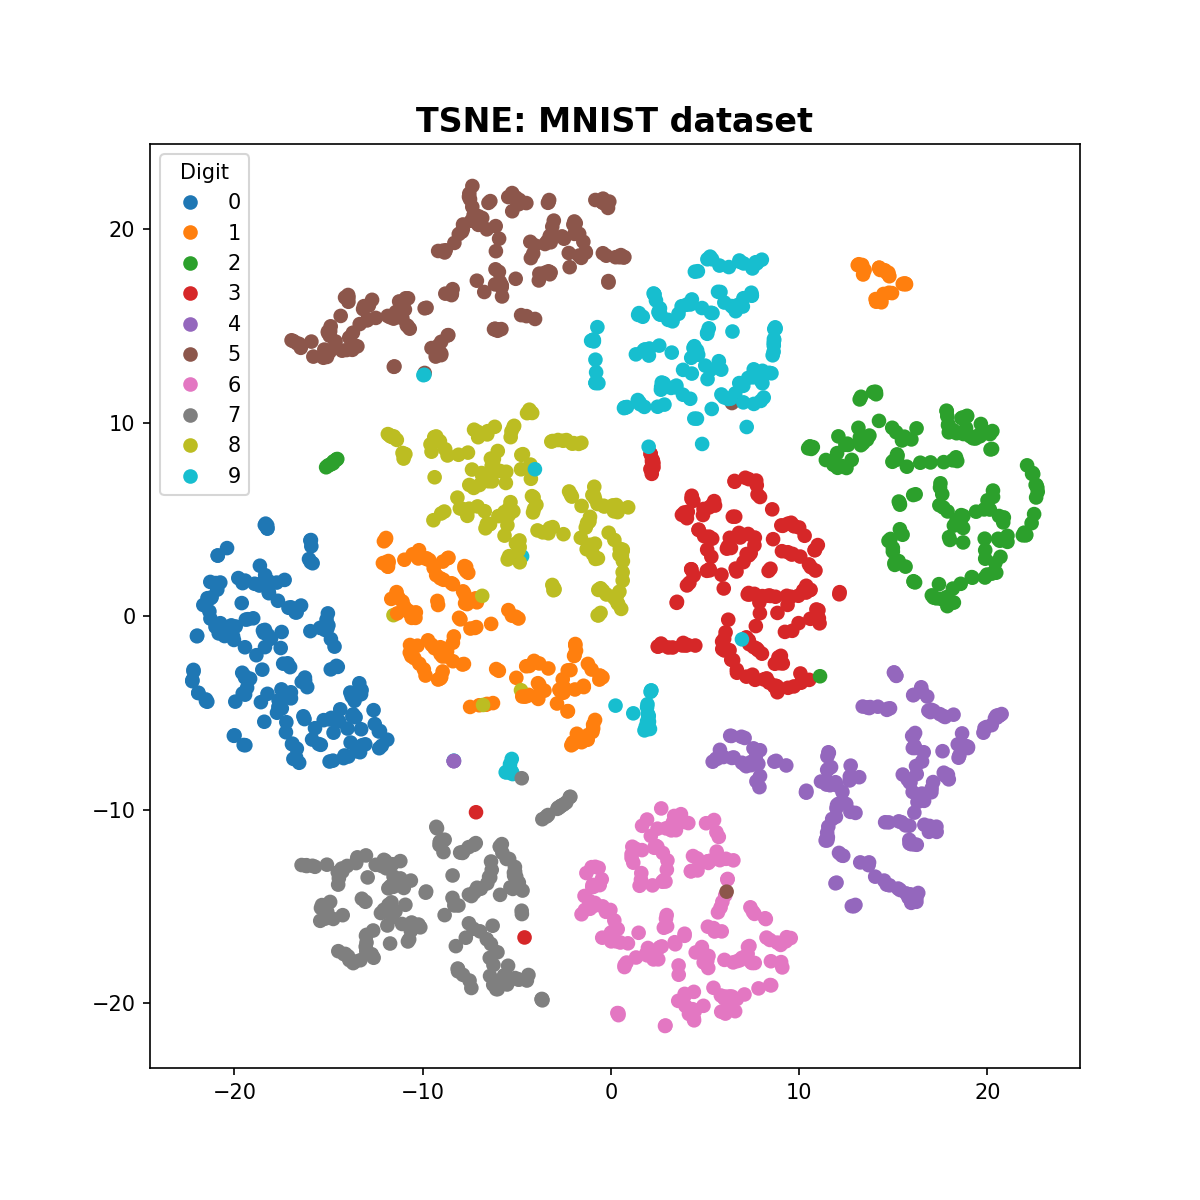

In [35]:
# Create the figure
fig = plt.figure( figsize=(8,8) )
# Create the scatter
cdict = {0: 'red', 1: 'blue', 2: 'green', 3:'yellow'}
scatter = plt.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=digits.target, 
    label=digits.target,
    cmap=plt.cm.get_cmap('tab10'), 
    )

plt.legend(*scatter.legend_elements(), loc="upper left", title="Digit")
plt.title("TSNE: MNIST dataset", fontsize=16, weight='bold')
plt.show()



In [36]:
pca = PCA(n_components=3)
projected = pca.fit_transform(digits.data)

<IPython.core.display.Javascript object>


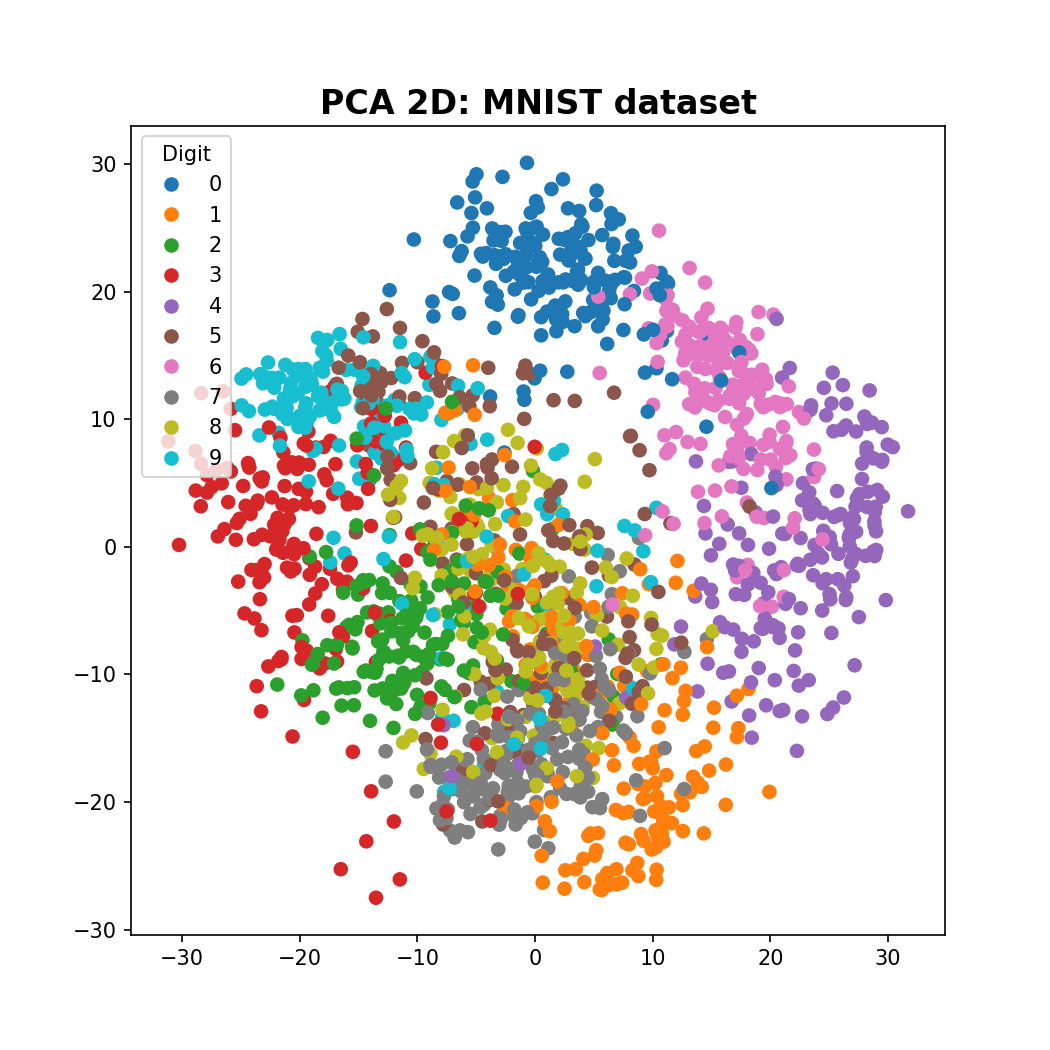

In [37]:
plt.figure(figsize=(7, 7))
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, cmap=plt.cm.get_cmap('tab10'),)
plt.legend(*scatter.legend_elements(), loc="upper left", title="Digit")
plt.title("PCA 2D: MNIST dataset", fontsize=16, weight='bold')
plt.show()

In [38]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

<IPython.core.display.Javascript object>


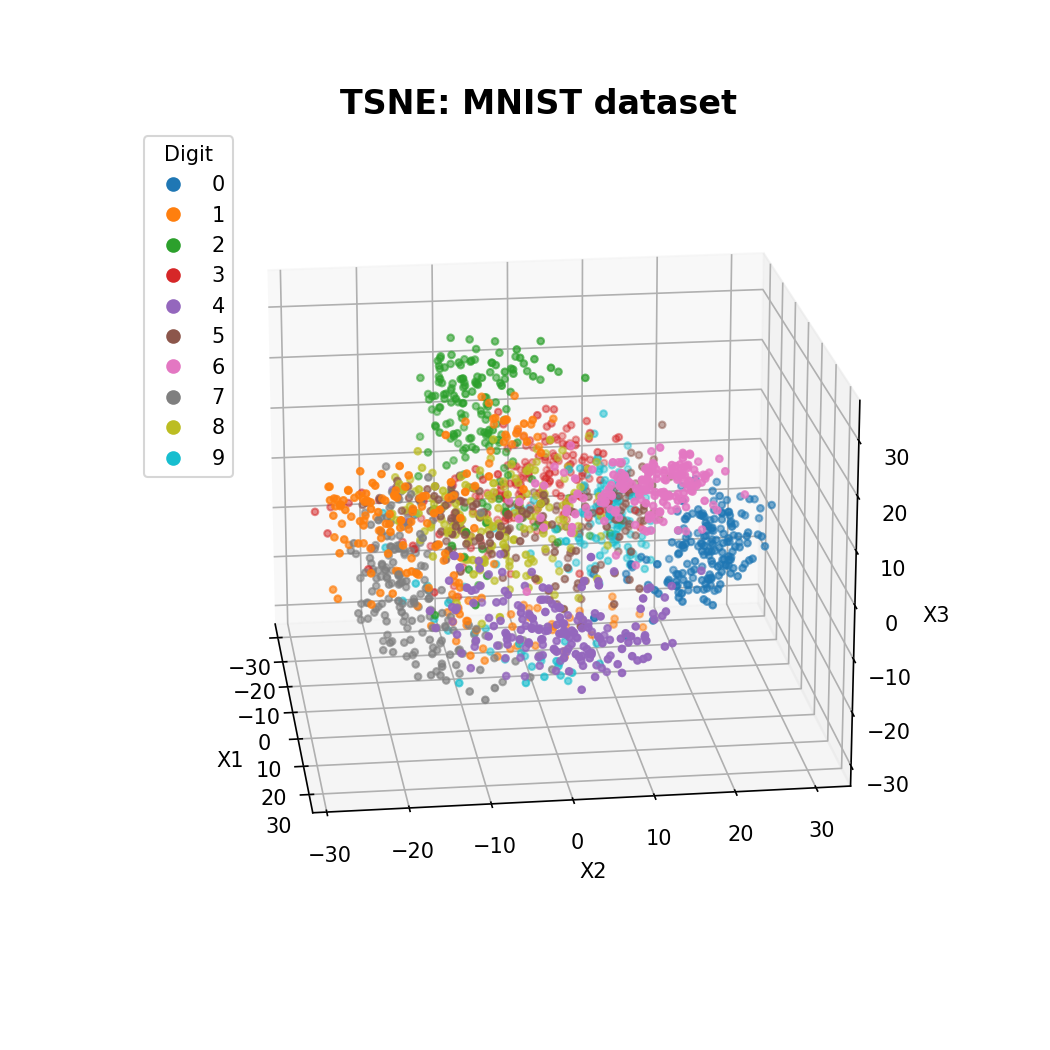

In [39]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(
    projected[:, 0],
    projected[:, 1],
    projected[:, 2],
    marker='o',
    s=10,
    c=digits.target, 
    label=digits.target,
    cmap=plt.cm.get_cmap('tab10'), 
)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend(*scatter.legend_elements(), loc="upper left", title="Digit")
ax.set_title("TSNE: MNIST dataset", fontsize=16, weight='bold')

for i in range(90, 360, 10):
    ax.view_init(None, i)
    plt.show()